# Data Analytics

todo : 
- Get Insight as much as possible
- Classification with General_Health as Label
- Create New Cluster excluding General_Health

In [17]:
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(12,18))
plt.style.use('ggplot')

<Figure size 1200x1800 with 0 Axes>

In [2]:
file = 'CVD_cleaned.csv'

In [3]:
df = pd.read_csv(file)
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

There is no column that contains null value. What a relief

In [5]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Since Most Columns are categorical Values, we only possible to catch these data. We should catch more after Encode the Categorical Columns

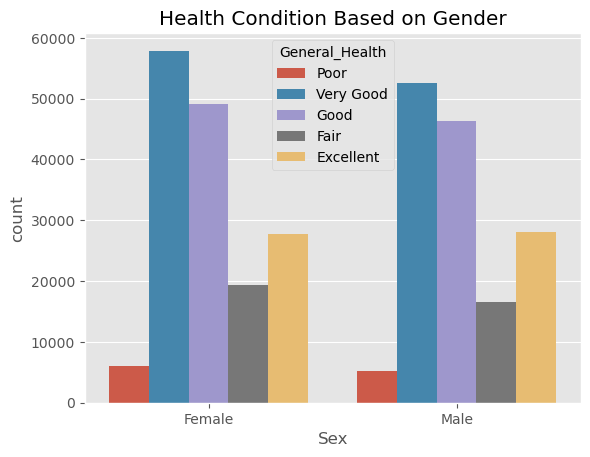

In [12]:
# Lets Start From basic, to show how are health condition based on gender

sb.countplot(data = df,hue=df.General_Health,x=df.Sex)
plt.title('Health Condition Based on Gender')
plt.show()


In [34]:
df.Diabetes.unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

Apparently there is another category beside Yes/No. Pre-diabetes can be included to No, but Pregnancy Diabetes also called gestational diabetes

In [54]:
#Use Copy of main dataframe

df2 = df.copy()

df2.loc[df['Diabetes'] == 'No, pre-diabetes or borderline diabetes','Diabetes'] = 'No'

In [57]:
df2.loc[df['Diabetes'] == 'Yes, but female told only during pregnancy','Diabetes'] = 'Gestational'

In [58]:
df2.Sex.unique()

array(['Female', 'Male'], dtype=object)

In [59]:
df2.Diabetes.unique()

array(['No', 'Yes', 'Gestational'], dtype=object)

<Figure size 1800x2000 with 0 Axes>

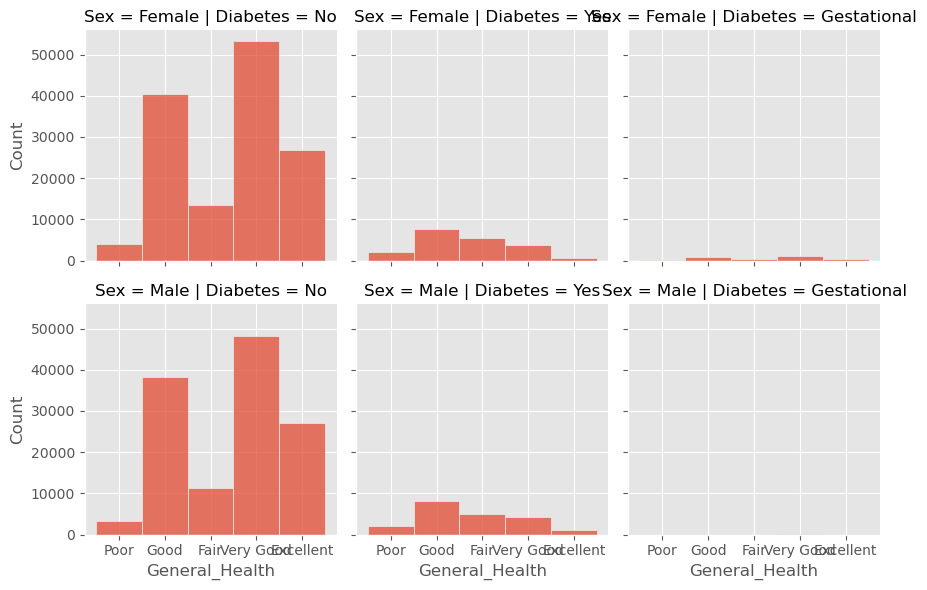

In [60]:
plt.figure(figsize=(18,20))
gender_based = sb.FacetGrid(df2,col='Diabetes',row='Sex')
gender_based.map(sb.histplot,'General_Health')
plt.show()